# Copy Items From one Organization to Another
### Run this sample to connect to the source & destination GIS and get started:

#### You will be prompted to input the url, username, and password for the source agol organization account.



In [ ]:
from arcgis.gis import GIS
from IPython.display import display

uriS = input("What is the soure org/portal url: ")
unS = input("What is the source org Username: ")

def authSource():
    global sourceOrg
    sourceOrg = GIS(uriS, unS)
    print("Logged in as: " + sourceOrg.properties.user.username)
authSource()


#### After running the next cell, a browser window will launch requesting an authentication string via SAML as Enterprise Logins are enforced in government.maps.arcgis.com. Copy the string and paste it directly into the notebook. 

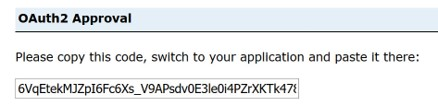

In [ ]:
destOrg = GIS("https://government.maps.arcgis.com", client_id = "YaMKYbXuSkd02G9i")
print("Logged in as: " + destOrg.properties.user.username)


orig_userid =  unS
new_userid = unS

#capture/print information about sourceOrg User
sourceUser = sourceOrg.users.get(orig_userid)
newUser = destOrg.users.get(new_userid)

usergroups = sourceUser['groups']



for group in usergroups:
    grp = sourceOrg.groups.get(group['id'])


#### You will be prompted for the item id which can be obtained from the source agol organization.

In [ ]:
a = input("What is the Item ID: ")
def item(a):
    global itemId
    itemId = sourceOrg.content.get(a)
    print(itemId)
item(a)

#define a function to instantiate the list as the ContentManager class clone_items method requires an input list param.
def createList():
    global li
    li = []
    li.append(itemId)
createList()


#function that copies item id into the previously created list
try:
    def copyItem():
        copy = destOrg.content
        copy.clone_items(li, copy_data=True)
    copyItem()
    print("Copy Items was successful!")
except:
    print("There was an error with the copy process")
finally:
    print("The script is finished...") 
    
    
    